In [1]:
################################################################################
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import networkx as nx
import importlib
import warnings
from tracker import extractor, utils, metrics, visuals
from typing import List, Tuple
warnings.filterwarnings("ignore")

In [2]:
################################################################################
filename = "data/sets/NORM-10N-25T-25000E-235R.gz"
frame = pd.read_csv(filename)
frame = frame[(frame["noise"] == 0) & (frame["padding"] == 0)]

In [3]:
################################################################################
events = (event for (_, event) in frame.groupby("event_id", sort=False))
events = sorted(events, key=(lambda event: len(event["cluster_id"].unique())))

In [47]:
################################################################################
event  = events[-1]
order  = ["phi", "r", "z"]
data   = extractor.extract_input(event, order)
matrix = extractor.extract_output(event, order)

In [40]:
################################################################################
matrix[8, 1] = 1
matrix[7, 1] = 1
matrix[6, 1] = 1
matrix[6, 2] = 1
matrix[6, 3] = 1
matrix[6, 0] = 1
matrix

array([[ 0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  0.,  0.],
       [ 1.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  

In [48]:
################################################################################
visuals.display(event, order)

,phi,r,z,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y
0,-3.134064,213.0,21.368477,,,,,,,,,,,,,,,,,,,,,,,,,1
1,-3.123592,271.0,27.187123,,,,,,,,,,,,,,,,,,,,,,,,,1
2,-3.100361,405.0,40.630202,,,,,,,,,,,,,,,,,,,,,,,,,1
3,-3.086632,155.0,29.329779,,,,,,,,,,,,,,,,,,,,,,,,1,
4,-3.079410,1000.0,-199.813364,,1,,,,,,,,,,,,,,,,,,,,,,,
5,-3.073163,562.0,56.380676,,,,,,,,,,,,,,,,,,,,,,,,,1
6,-3.065290,271.0,-13.054622,,,1,,,,,,,,,,,,,,,,,,,,,,
7,-3.042472,762.0,-152.257783,,1,,,,,,,,,,,,,,,,,,,,,,,
8,-3.041651,1000.0,57.934034,,,,1,,,,,,,,,,,,,,,,,,,,,
9,-3.037449,762.0,76.444973,,,,,,,,,,,,,,,,,,,,,,,,,1


In [49]:
################################################################################
def cartesian(phi: float, r: float) -> Tuple[float, float]:
    return (r * np.cos(phi), r * np.sin(phi))

def draw(graph) -> None:
    positions = [cartesian(n["phi"], n["r"]) for (_, n) in graph.nodes(True)]
    colors    = [color for (_, _, color) in graph.edges(data="track")]
    nx.draw_networkx(
        G=graph, pos=positions,
        node_size=200, node_color="black",
        font_size="8", font_color="yellow",
        edge_color=colors, style="solid",
        edge_cmap=plt.cm.prism)

    edge_labels = {}
    for (u, v, i) in graph.edges(data="track"):
        label = edge_labels.get((u, v))
        edge_labels[(u, v)] = "{0}, {1}".format(label, i) if label else str(i)
    nx.draw_networkx_edge_labels(graph, positions,
                                 edge_labels=edge_labels, font_size="8")

In [50]:
################################################################################
graph = nx.MultiDiGraph()
for n, hit in enumerate(data):
    phi, r, z = (hit[order.index(string)] for string in ("phi", "r", "z"))
    graph.add_node(n=n, phi=phi, r=r, z=z)
#draw(graph)

In [51]:
################################################################################
radiuses = np.unique(data[:, order.index("r")])
tracks = [[[] for _ in radiuses] for _ in matrix.T]
for (row, track_id) in np.stack(matrix.nonzero(), axis=-1):
    radius_index = np.where(radiuses == data[row, order.index("r")])[0][0]
    tracks[track_id][radius_index].append(row)
tracks = [[layer for layer in track if layer] for track in tracks]

In [52]:
################################################################################
for track_id, track in enumerate(tracks):
    for i in range(len(track) - 1):
        for sink_index in track[i]:
            for source_index in track[(i + 1)]:
                graph.add_edge(source_index, sink_index, track=track_id)

<IPython.core.display.Javascript object>


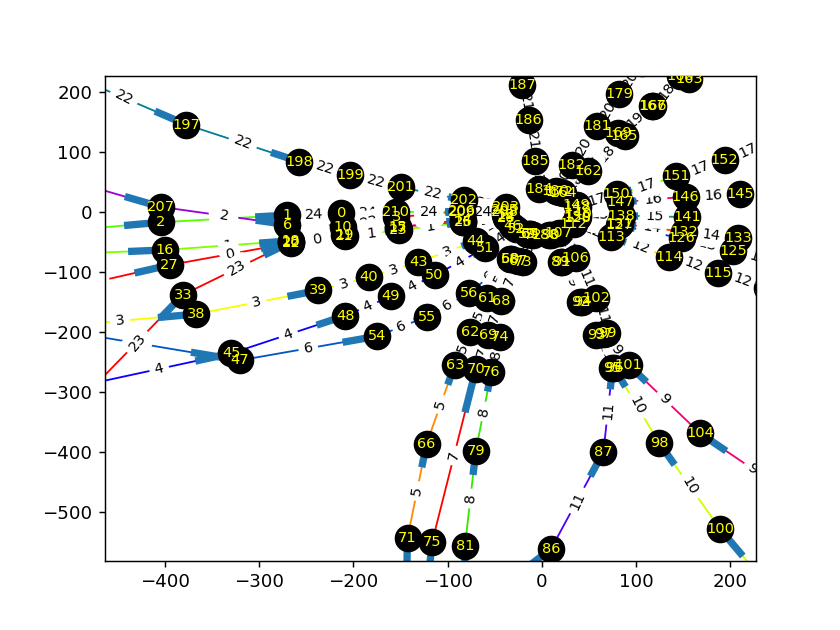

In [55]:
################################################################################
draw(graph)

## Problem:
#### Let G be a directed, acyclic, weakly-connected multigraph.
#### G has n source vertices and 1 sink vertex.
#### Every edge in G has an integer label within [0, 1, ..., (n - 1)].
#### Determine whether there exist n vertex-disjoint paths from each source vertex to the sink vertex, such that each path contains only edges with the same label and each path contains a unique label. If these paths exist, return them. If there is more than 1 unique set of paths, just return 1 of them.

In [56]:
import pandas as pd
frame = pd.read_csv("data/sets/ACTS-MU10-PT1000-COMPLETE.gz")

In [74]:
cols  = ["event_id", "cluster_id", "r", "phi", "z"]
small = frame[frame["event_id"] < 20][cols]
small = small.sort_values(cols)
small.to_csv("data/sets/ACTS-SMALL-NOT-PREPARED.gz", compression="gzip")